##**EDA - 1**

##**About - Dataset**:

Here is the dataset link: [Bike Details Dataset](https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view)

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

##**Title: Bike Details Dataset**

**Source:**

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


**Description:**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

##**Title: Bike Details Dataset**

- **=name:** Brand and model name of the bike (Categorical, e.g., "Royal Enfield
Classic 350", "Honda Dio").
- **selling_price:** Listed selling price in INR (Numeric, e.g., 175000, 45000).
- **year:** Manufacturing year of the bike (Numeric, e.g., 2019, 2015).
- **seller_type:** Seller category, either "Individual" or "Dealer" (Categorical).
- owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical).
- **km_driven:** Total kilometers driven (Numeric, in km, e.g., 12000, 23000).
- **ex_showroom_price**: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

**Solution:** To answer these questions, we need to analyze the dataset. For that we have to perform Exploratory Data Analysis (EDA) on the dataset using Python and libraries such as pandas, numpy, and matplotlib. Below is given the step-by -step process to perform EDA:

* **Step 1: Import Necessary Libraries**
* **Step 2: Load the Dataset**
* **Step 3: Basic Dataset Information**
* **Step 4: Answering the questions**

In [ ]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all columns in single row:
pd.set_option('display.expand_frame_repr', False)

# Load the dataset
url = '/content/BIKE DETAILS.csv'
df = pd.read_csv(url)


# Basic Dataset Information:
# Display the first few rows of the dataset
print(df.head())

# Get dataset information
print(df.info())

# Get summary statistics
print(df.describe())



                                  name  selling_price  year seller_type      owner  km_driven  ex_showroom_price
0            Royal Enfield Classic 350         175000  2019  Individual  1st owner        350                NaN
1                            Honda Dio          45000  2017  Individual  1st owner       5650                NaN
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual  1st owner      12000           148114.0
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual  1st owner      23000            89643.0
4                Yamaha SZ [2013-2014]          20000  2011  Individual  2nd owner      21000                NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               

**Q1. What is the range of selling prices in the dataset?**

In [ ]:
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
print(f"Range of Selling Prices: {selling_price_range}")


Range of Selling Prices: (5000, 760000)


**Q2. What is the median selling price for bikes in the dataset?**

In [ ]:
median_selling_price = df['selling_price'].median()
print(f"Median Selling Price: {median_selling_price}")

Median Selling Price: 45000.0


**Q3. What is the most common seller type?**

In [ ]:
common_seller_type = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {common_seller_type}")

Most Common Seller Type: Individual


**Q4. How many bikes have driven more than 50,000 kilometers?**

In [ ]:
bikes_above_50000_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 kilometers: {bikes_above_50000_km}")

Number of bikes driven more than 50,000 kilometers: 170


**Q5. What is the average km_driven value for each ownership type?**

In [ ]:
average_km_driven_per_owner = df.groupby('owner')['km_driven'].mean()
print(average_km_driven_per_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**Q6. What proportion of bikes are from the year 2015 or older?**

In [ ]:
proportion_2015_or_older = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2f}")

Proportion of bikes from 2015 or older: 0.57


**Q7. What is the trend of missing values across the dataset?**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


**Q8. What is the highest ex_showroom_price recorded, and for which bike?**

In [ ]:
highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Highest ex_showroom_price: {highest_ex_showroom_price['ex_showroom_price']}, Bike: {highest_ex_showroom_price['name']}")

Highest ex_showroom_price: 1278000.0, Bike: Harley-Davidson Street Bob


**Q9. What is the total number of bikes listed by each seller type?**

In [ ]:
bikes_per_seller_type = df['seller_type'].value_counts()
print(bikes_per_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**Q10. What is the relationship between selling_price and km_driven for first-owner bikes?**

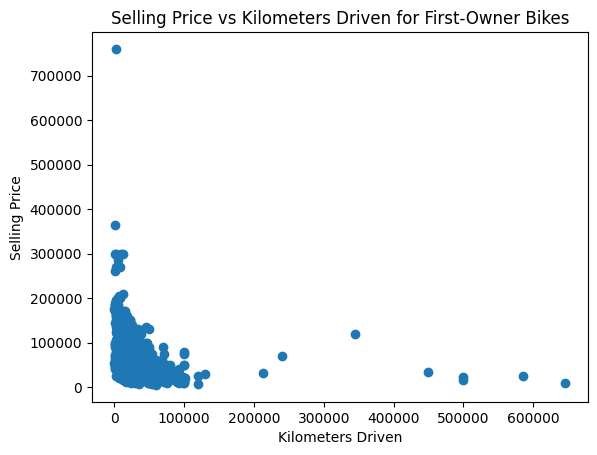

In [ ]:
first_owner_bikes = df[df['owner'] == '1st owner']
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Kilometers Driven for First-Owner Bikes')
plt.show()

**Q11. Identify and remove outliers in the km_driven column using the IQR method.**

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]

**Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

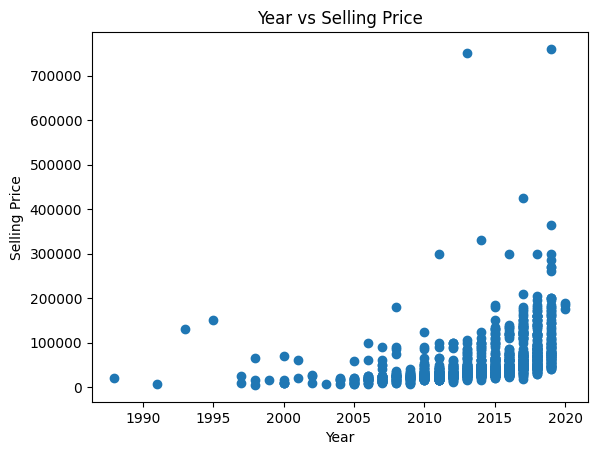

In [ ]:
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price')
plt.show()

**Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing**
**year)?**

In [ ]:
current_year = 2025
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print(average_depreciation)

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


**Q14. Which bike names are priced significantly above the average price for their manufacturing year?**

In [ ]:
average_price_per_year = df.groupby('year')['selling_price'].mean()
significantly_above_average = df[df['selling_price'] > df['year'].map(average_price_per_year)]
print(significantly_above_average[['name', 'selling_price', 'year']])

                                      name  selling_price  year
0                Royal Enfield Classic 350         175000  2019
2      Royal Enfield Classic Gunmetal Grey         150000  2018
3        Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                           Yamaha YZF R3         365000  2019
...                                    ...            ...   ...
1004                  Bajaj Pulsar  NS 200          60000  2016
1005                    TVS Apache RTR 160          60000  2014
1008                    Bajaj Pulsar 220 F          52000  2012
1012                   Bajaj Pulsar NS 200          50000  2014
1023                Bajaj Avenger 220 dtsi          45000  2012

[334 rows x 3 columns]
                                      name  selling_price  year
0                Royal Enfield Classic 350         175000  2019
2      Royal Enfield Classic Gunmetal Grey         150000  2018
3        Yamaha 

**Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

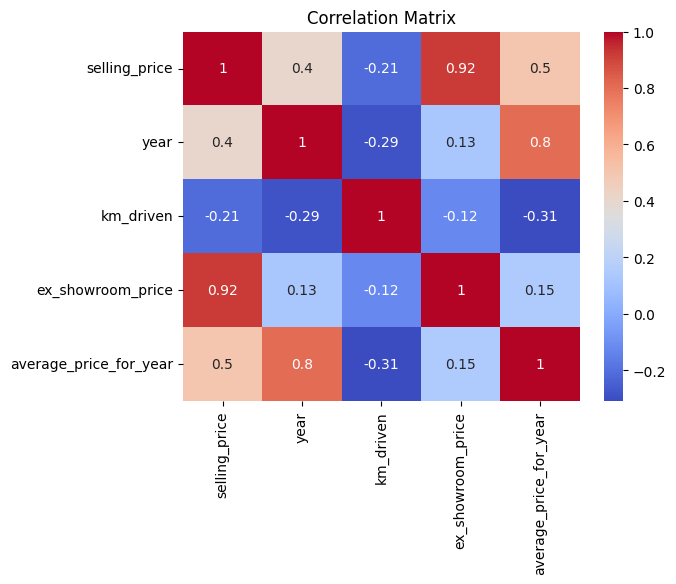

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##**EDA - 2**

##**About - Dataset:**

Here is the dataset link: [Car Sales](https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view)

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

##**Title: Car Sale Dataset**
**Source:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.


**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

##**Features:**
* Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
* Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
* Customer Name: The name of the customer who purchased the car, represented as a string.
* Gender: The gender of the customer, categorized as "Male" or "Female.
* Annual Income: The customer's annual income in US dollars, represented as a numeric value.
* Dealer_Name: The name of the dealership selling the car, represented as a string.
* Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
* Model: The specific model name of the car, such as "Corolla," "Civic," etc.
* Engine: The engine type of the car, such as "V6," "I4," etc.
* Transmission: The type of transmission in the car, either "Manual" or "Automatic..
* Color: The color of the car, represented as a string (e.g., "Red," "Blue").
* Price ($): The selling price of the car in US dollars.
* Dealer_No: A unique identifier for each car dealer in the dataset.
* Body Style: The body style of the car, such as "Sedan," "SUV," etc.
* Phone: The phone number of the customer who purchased the car.
* Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.



**Solution:** To answer the questions for the Car Sales Dataset, we will perform an Exploratory Data Analysis (EDA) using Python and libraries like Pandas, NumPy, Matplotlib, and Seaborn. Below is the step-by-step approach to address each question:

* **Step 1: Import Necessary Libraries**
* **Step 2: Load the Dataset**
* **Step 3: Basic Dataset Information**
* **Step 4: Answering the questions**

In [ ]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all columns in single row:
pd.set_option('display.expand_frame_repr', False)

# Load the dataset
url = '/content/Car Sale.csv'
df = pd.read_csv(url)


# Basic Dataset Information:
# Display the first few rows of the dataset
print(df.head())

# Get dataset information
print(df.info())

# Get summary statistics
print(df.describe())

         Car_id      Date Customer Name Gender  Annual Income                          Dealer_Name   Company       Model                     Engine Transmission       Color  Price ($)  Dealer_No  Body Style    Phone Dealer_Region
0  C_CND_000001  1/2/2022     Geraldine   Male          13500  Buddy Storbeck's Diesel Service Inc      Ford  Expedition  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834        SUV  8264678    Middletown
1  C_CND_000002  1/2/2022           Gia   Male        1480000                     C & M Motors Inc     Dodge     Durango  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114        SUV  6848189        Aurora
2  C_CND_000003  1/2/2022        Gianna   Male        1035000                          Capitol KIA  Cadillac    Eldorado          Overhead Camshaft       Manual         Red      31500  38701-8047  Passenger  7298798    Greenville
3  C_CND_000004  1/2/2022       Giselle   Male          13500               Chry

**Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

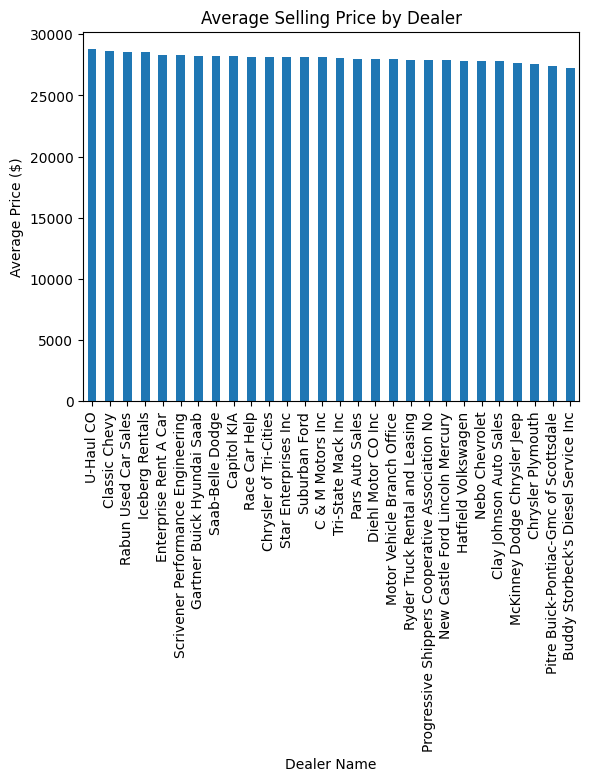

In [ ]:
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_dealer)

# Visualization
avg_price_by_dealer.plot(kind='bar', title='Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.show()

**Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


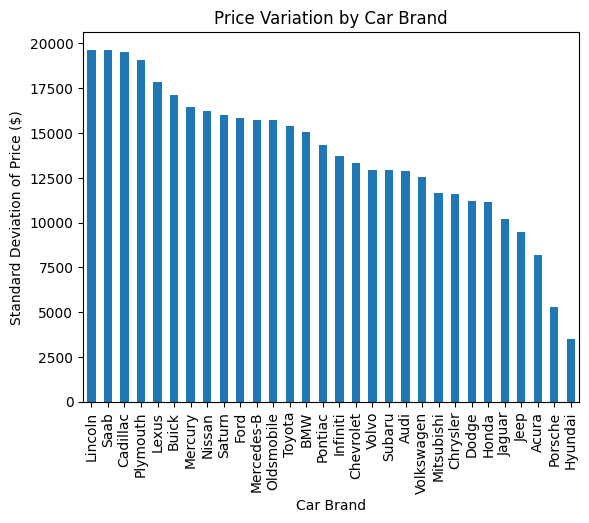

In [ ]:
price_variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation_by_brand)

# Visualization
price_variation_by_brand.plot(kind='bar', title='Price Variation by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Standard Deviation of Price ($)')
plt.show()

**Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

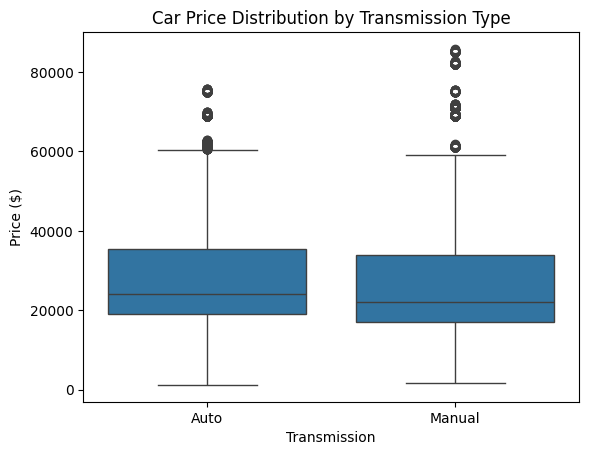

In [ ]:
import seaborn as sns

sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.show()

**Q4. What is the distribution of car prices across different regions?**

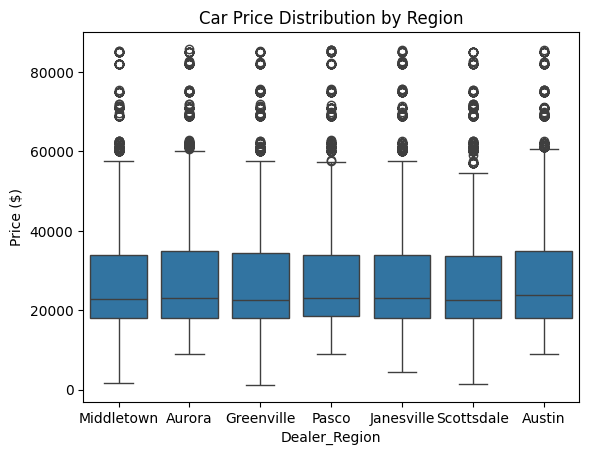

In [ ]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Region')
plt.show()

**Q5. What is the distribution of cars based on body styles?**

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


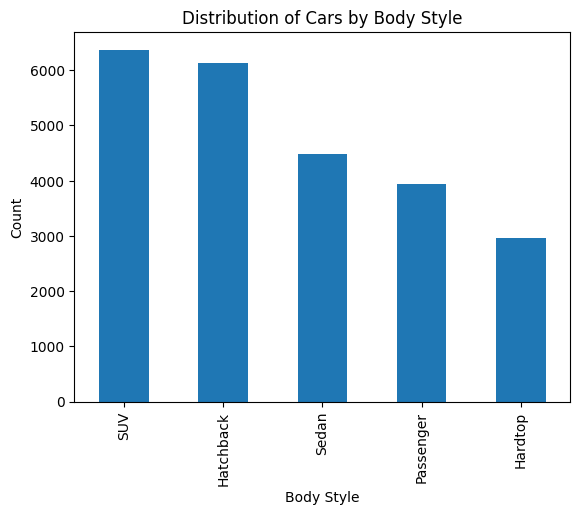

In [ ]:
body_style_distribution = df['Body Style'].value_counts()
print(body_style_distribution)

# Visualization
body_style_distribution.plot(kind='bar', title='Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

**Q6. How does the average selling price of cars vary by customer gender and annual income?**

<ipython-input-20-7f6209d677a5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()


Gender  Annual Income          
Female  (-1109.92, 2248064.0]      28218.888484
        (2248064.0, 4486048.0]     30183.052980
        (4486048.0, 6724032.0]     28318.875000
        (6724032.0, 8962016.0]              NaN
        (8962016.0, 11200000.0]             NaN
Male    (-1109.92, 2248064.0]      27996.376891
        (2248064.0, 4486048.0]     29021.878710
        (4486048.0, 6724032.0]     27520.139535
        (6724032.0, 8962016.0]     40333.333333
        (8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


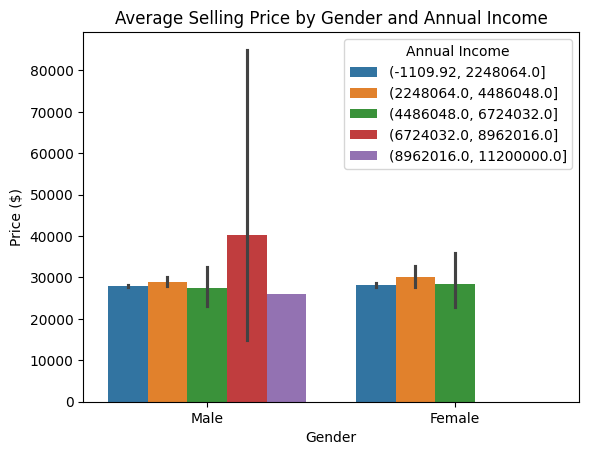

In [ ]:
avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()
print(avg_price_by_gender_income)

# Visualization
sns.barplot(x='Gender', y='Price ($)', hue=pd.cut(df['Annual Income'], bins=5), data=df)
plt.title('Average Selling Price by Gender and Annual Income')
plt.show()

**Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

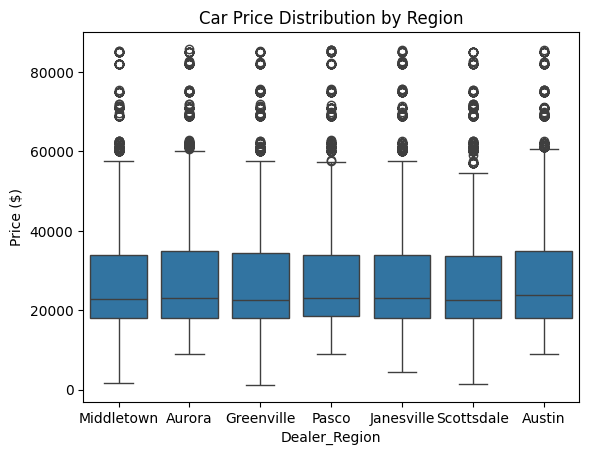

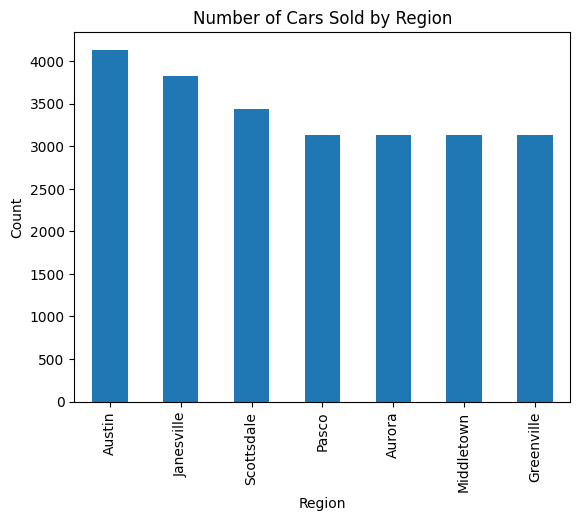

In [ ]:
# Price distribution by region
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Region')
plt.show()

# Number of cars sold by region
cars_sold_by_region = df['Dealer_Region'].value_counts()
cars_sold_by_region.plot(kind='bar', title='Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

**Q8. How does the average car price differ between cars with different engine sizes?**

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


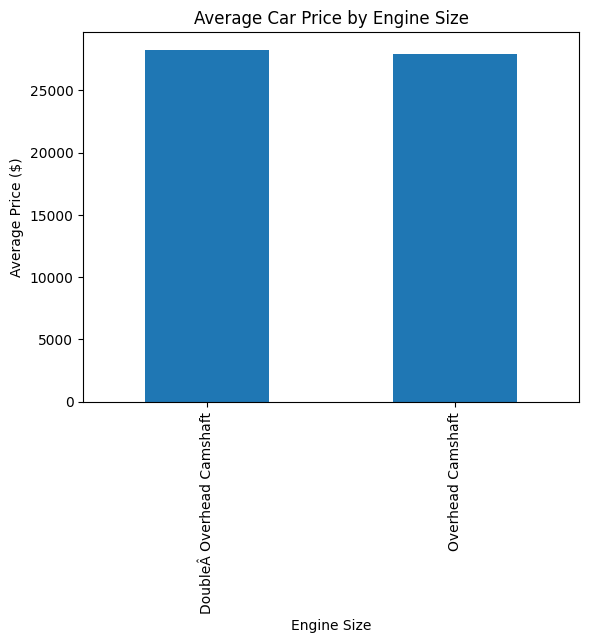

In [ ]:
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_engine)

# Visualization
avg_price_by_engine.plot(kind='bar', title='Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.show()

**Q9. How do car prices vary based on the customer’s annual income bracket?**

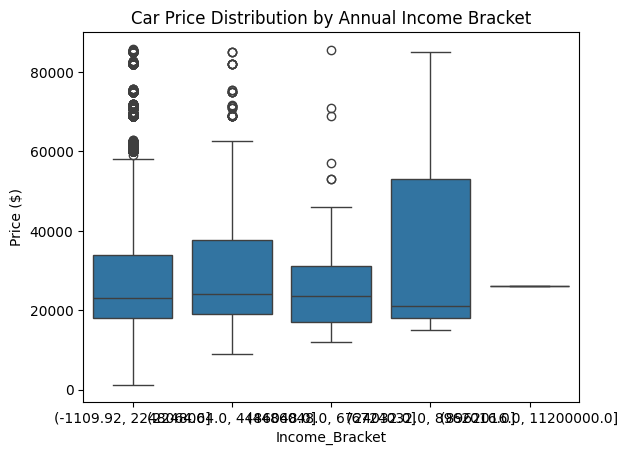

In [ ]:
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=5)
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Annual Income Bracket')
plt.show()

**Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

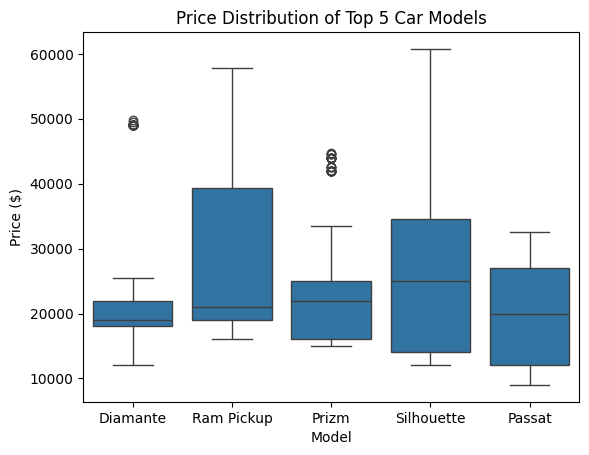

In [ ]:
top_5_models = df['Model'].value_counts().nlargest(5).index
top_5_data = df[df['Model'].isin(top_5_models)]

# Visualization
sns.boxplot(x='Model', y='Price ($)', data=top_5_data)
plt.title('Price Distribution of Top 5 Car Models')
plt.show()

**Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

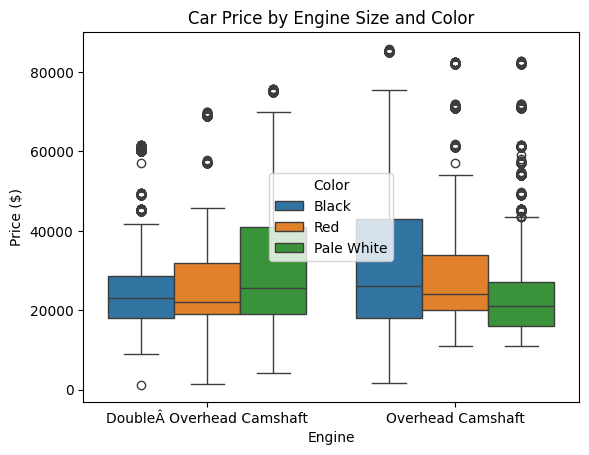

In [ ]:
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price by Engine Size and Color')
plt.show()

**Q12. Is there any seasonal trend in car sales based on the date of sale?**

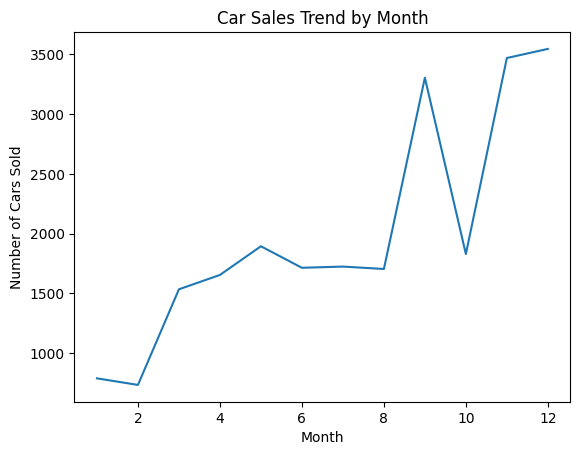

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df['Month'].value_counts().sort_index()

# Visualization
sales_by_month.plot(kind='line', title='Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

**Q13. How does the car price distribution change when considering different combinations of body style and transmission type?**

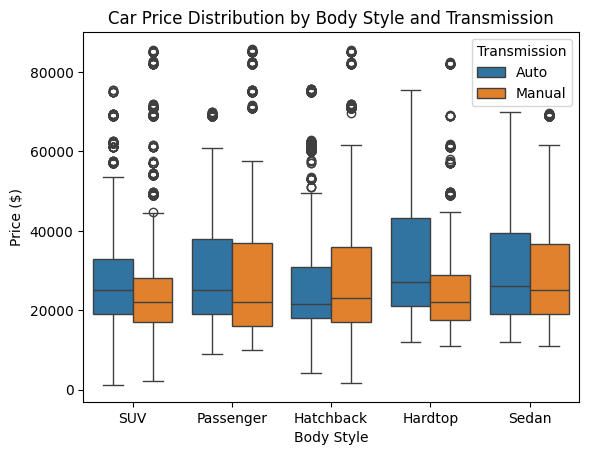

In [ ]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.show()

**Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

               Price ($)  Engine_Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine_Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


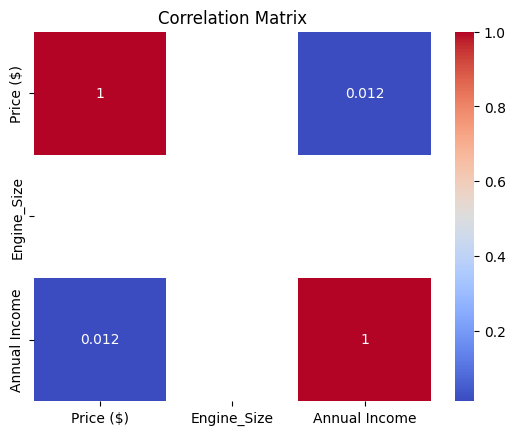

In [ ]:
import seaborn as sns

# Map engine types to numeric values
engine_mapping = {'I4': 4, 'I6':6, 'V6':6, 'V8':8, 'Electric':0}  # Adjust based on your data
df['Engine_Size'] = df['Engine'].map(engine_mapping)

# Correlation matrix
numeric_columns = df[['Price ($)', 'Engine_Size', 'Annual Income']]
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##**EDA - 3**

**Amazon Sales Data**

**Description:**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.



**Features:**

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product

**Source:** [Amazon Sales](https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view)


**Solution:** To perform an EDA on the Amazon Sales Dataset, we'll address each question systematically. Also there are some missing values so we have to preprocess the dataset before performing EDA. Below is the analysis and code implementation:

**Step 1: Load and Clean the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For sentiment analysis (if needed)

# Load the dataset
url = "/content/amazon.csv"
df = pd.read_csv(url)

# Drop rows with missing critical information
df = df.dropna(subset=['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'rating'])

# Convert price columns to numeric
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating to float
df['rating'] = df['rating'].str.replace('|','').replace('','0').astype(float)

# Convert rating_count to integer
df['rating_count'] = df['rating_count'].str.replace(',', '').fillna(0).astype(int)

**Q1. What is the average rating for each product category?**

                                              category  rating
57                       Computers&Accessories|Tablets    4.60
48   Computers&Accessories|NetworkingDevices|Networ...    4.50
62    Electronics|Cameras&Photography|Accessories|Film    4.50
81   Electronics|HomeAudio|MediaStreamingDevices|St...    4.50
196  OfficeProducts|OfficeElectronics|Calculators|B...    4.50
..                                                 ...     ...
88   Electronics|HomeTheater,TV&Video|Accessories|3...    3.50
2    Computers&Accessories|Accessories&Peripherals|...    3.50
187  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...    3.45
14   Computers&Accessories|Accessories&Peripherals|...    3.40
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...    3.30

[211 rows x 2 columns]


<ipython-input-2-8e3eb1a101c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating, x='rating', y='category', palette='viridis')


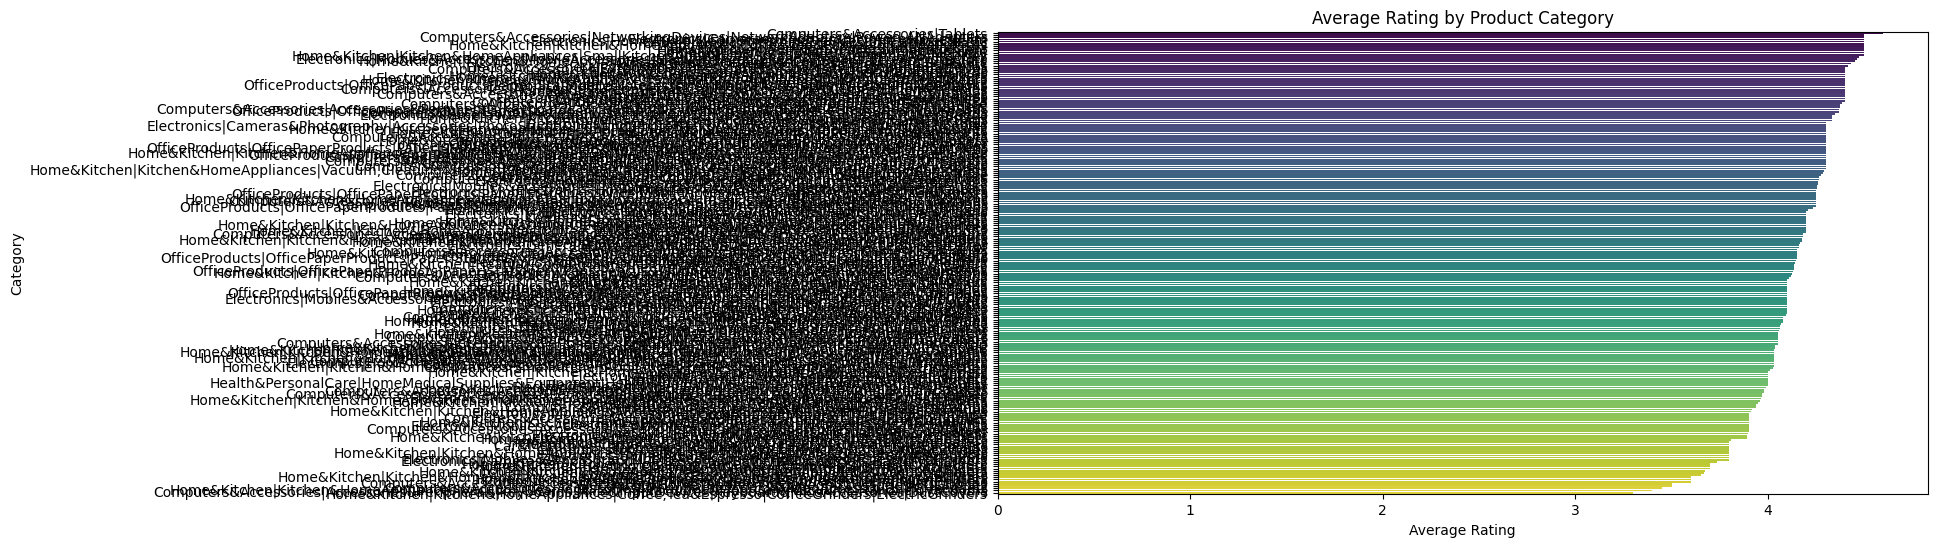

In [ ]:
average_rating = df.groupby('category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
print(average_rating)

plt.figure(figsize=(12,6))
sns.barplot(data=average_rating, x='rating', y='category', palette='viridis')
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

**Q2. What are the top rating_count products by category?**

In [ ]:
# Function to get top products per category
def top_products_by_category(df, top_n=5):
    top_products = df.groupby(['category', 'product_name'])['rating_count'].sum().reset_index()
    top_products = top_products.sort_values(['category', 'rating_count'], ascending=[True, False])
    return top_products.groupby('category').head(top_n)

top_products = top_products_by_category(df)
print(top_products)

                                               category  \
0     Car&Motorbike|CarAccessories|InteriorAccessori...   
2     Computers&Accessories|Accessories&Peripherals|...   
1     Computers&Accessories|Accessories&Peripherals|...   
3     Computers&Accessories|Accessories&Peripherals|...   
5     Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1332  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1335  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1334  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1333  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1336  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
0     Reffair AX30 [MAX] Portable Air Purifier for C...          1118  
2     rts [2 Pack] Mini USB C Type C Adapter Plug, T...          4426  
1     Kanget [2 Pack] Type C Female to USB A Male Ch...          1540  
3  

**Q3. What is the distribution of discounted prices vs. actual prices?**

In [ ]:
# Summary statistics
print(df[['discounted_price', 'actual_price']].describe())

# Calculate the discount amounts
df['discount_amount'] = df['actual_price'] - df['discounted_price']

# Visualization
plt.figure(figsize=(12,6))
sns.kdeplot(df['actual_price'], shade=True, label='Actual Price')
sns.kdeplot(df['discounted_price'], shade=True, label='Discounted Price')
plt.title('Price Distribution: Actual vs. Discounted')
plt.xlabel('Price')
plt.legend()
plt.show()


**Q4.  How does the average discount percentage vary across categories?**

                                              category  discount_percentage
106  Electronics|Mobiles&Accessories|MobileAccessor...                 90.0
6    Computers&Accessories|Accessories&Peripherals|...                 90.0
75   Electronics|Headphones,Earbuds&Accessories|Ear...                 90.0
73   Electronics|Headphones,Earbuds&Accessories|Ada...                 88.0
14   Computers&Accessories|Accessories&Peripherals|...                 87.5
..                                                 ...                  ...
196  OfficeProducts|OfficeElectronics|Calculators|B...                  0.0
176  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...                  0.0
81   Electronics|HomeAudio|MediaStreamingDevices|St...                  0.0
62    Electronics|Cameras&Photography|Accessories|Film                  0.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


<ipython-input-14-6f8fbe329cfb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_discount, x='discount_percentage', y='category', palette='coolwarm')


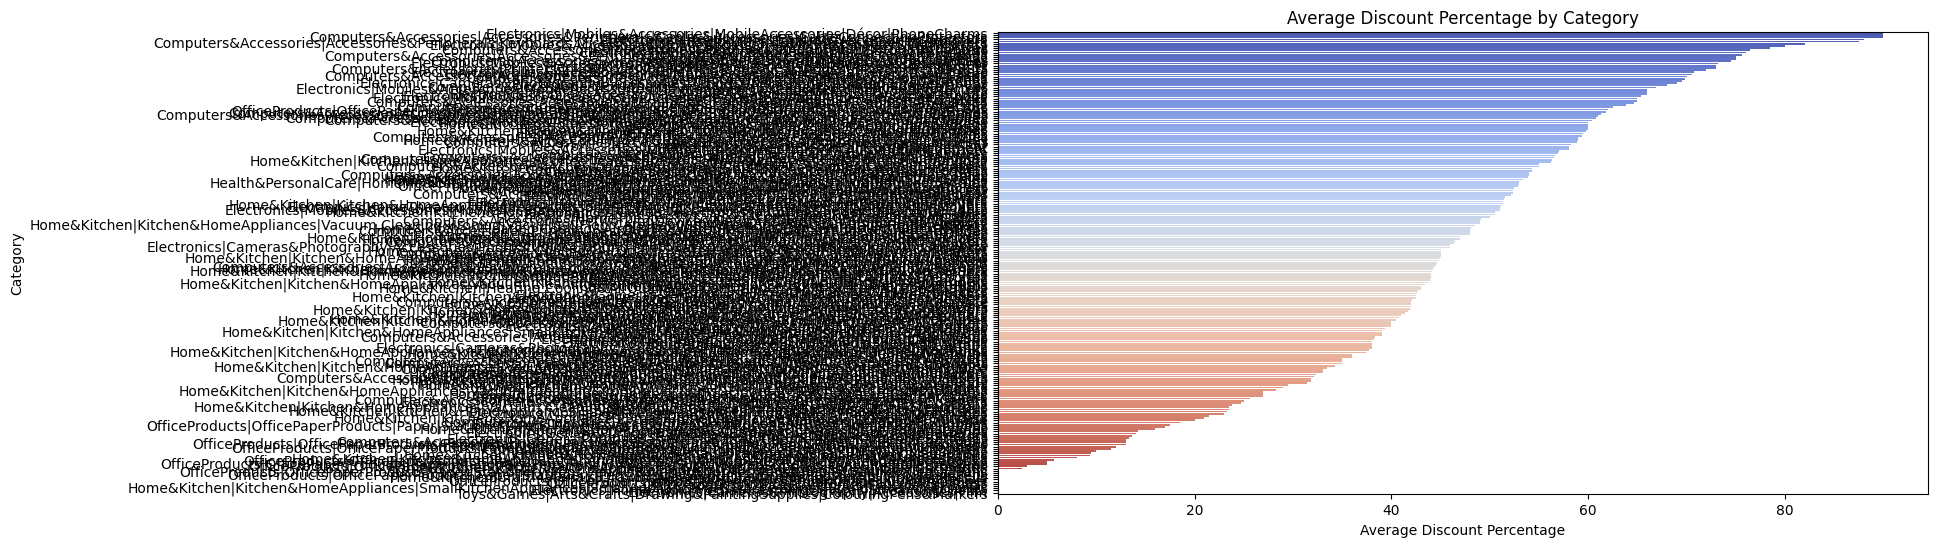

In [ ]:
average_discount = df.groupby('category')['discount_percentage'].mean().reset_index().sort_values(by='discount_percentage', ascending=False)
print(average_discount)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=average_discount, x='discount_percentage', y='category', palette='coolwarm')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Category')
plt.show()

Categories with higher average discounts might be more competitive or have excess inventory. This could influence customer purchasing decisions and reflect promotional strategies.

**Q5.  What are the most popular product names?**

In [ ]:
# Total rating counts per product
product_popularity = df.groupby('product_name')['rating_count'].sum().reset_index()
product_popularity = product_popularity.sort_values('rating_count', ascending=False).head(10)
print(product_popularity)

**Q6. What are the most popular product keywords?**

In [ ]:
# Combine product names and descriptions
text_data = df['product_name'] + ' ' + df['about_product']

# Tokenize and clean text
def extract_keywords(text_series):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(' '.join(text_series.dropna()).lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

keywords = extract_keywords(text_data)

# Get the frequency distribution
from collections import Counter
keyword_counts = Counter(keywords)
common_keywords = keyword_counts.most_common(20)
print(common_keywords)

**Q7.  What are the most popular product reviews?**

In [ ]:
# Merge ratings and reviews
reviews = df[['product_name', 'rating', 'rating_count', 'review_title', 'review_content']]
reviews = reviews.dropna(subset=['review_content'])

# Sort reviews by rating and rating count
top_reviews = reviews.sort_values(['rating', 'rating_count'], ascending=[False, False]).head(10)
print(top_reviews[['product_name', 'rating', 'rating_count', 'review_title', 'review_content']])

**Q8.  What is the correlation between discounted_price and rating?**

                  discounted_price    rating
discounted_price          1.000000  0.114298
rating                    0.114298  1.000000


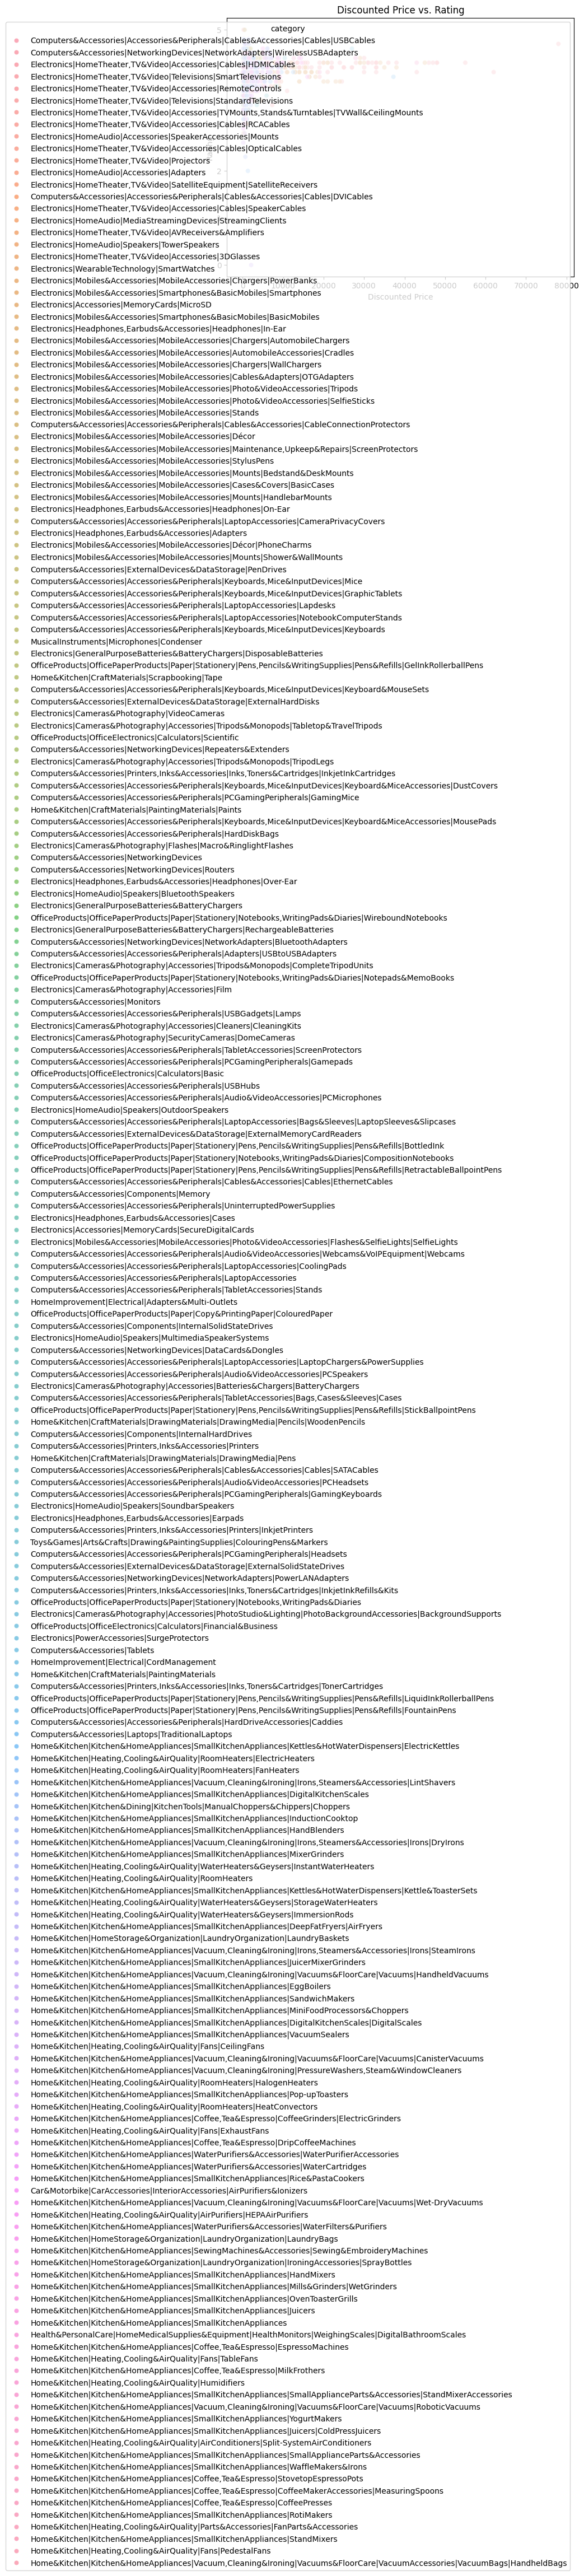

In [ ]:
# Correlation calculation
correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='discounted_price', y='rating', hue='category', alpha=0.6)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

**Q9.  What are the Top 5 categories based on the highest ratings?**

In [ ]:
category_ratings = df.groupby('category')['rating'].mean().reset_index()
top_categories = category_ratings.sort_values('rating', ascending=False).head(5)
print(top_categories)

**Q10. Identify any potential areas for improvement or optimization based on the data analysis.**

**Ans:** **Analysis and Recommendations**
* Underperforming Categories: Categories with lower average ratings might require quality assessment or improved customer support.

In [ ]:
lowest_rated_categories = category_ratings.sort_values('rating').head()
print("Categories with Lowest Average Ratings:")
print(lowest_rated_categories)

* Pricing Strategies: If certain categories have high discounts but low sales, reevaluate pricing strategies.

* Product Descriptions: Enhance product listings by incorporating popular keywords identified earlier, improving searchability and appeal.

* Customer Reviews: Address common issues mentioned in negative reviews to improve product quality and customer satisfaction.

* Inventory Management: For products with high demand (high rating counts), ensure adequate stock levels to capitalize on sales opportunities.

* Marketing Focus: Invest in marketing for top categories and products to maximize revenue and market share.

* Customer Engagement: Encourage reviews and ratings to build trust and provide social proof, which can drive sales.

##**EDA - 4**

**Dataset Link**: [Spotify Data: Popular Hip-hop Artists and Tracks](https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view)


**Description of the Dataset:**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


**Application in Data Science:**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors:**


Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

**Solution:** To perform EDA (Exploratory Data Analysis) on the Spotify Hip-Hop Tracks Dataset, we will follow the steps below:

* **Step 1: Import Necessary Libraries**
* **Step 2: Load the Dataset**
* **Step 3: Basic Dataset Information**
* **Step 4: Answering the questions**

In [2]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# For displaying all columns in single row:
pd.set_option('display.expand_frame_repr', False)

# Load the dataset
url = '/content/spotify.csv'
df = pd.read_csv(url)


# Basic Dataset Information:
# Display the first few rows of the dataset
print(df.head())

# Get dataset information
print(df.info())

# Get summary statistics
print(df.describe())

  Artist                               Track Name  Popularity  Duration (ms)                Track ID
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191  1yeB8MUNeLo9Ek1UEpsyz6
1  Drake                                One Dance          91         173986  1zi7xx7UVEFkmKfv06H8x0
2  Drake                       IDGAF (feat. Yeat)          90         260111  2YSzYUF3jWqb9YP9VXmpjE
3  Drake     First Person Shooter (feat. J. Cole)          88         247444  7aqfrAY2p9BUSiupwk3svU
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364  3F5CgOj3wFlRv51JsHbxhe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null

**Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do**
**the needful.**

In [4]:
# Check for null values
print(df.isnull().sum())

# Drop rows with null values (if any)
df.dropna(inplace=True)

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Final dataset shape
print(f"Data shape after cleaning: {df.shape}")

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 0
Data shape after cleaning: (413, 5)


**Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

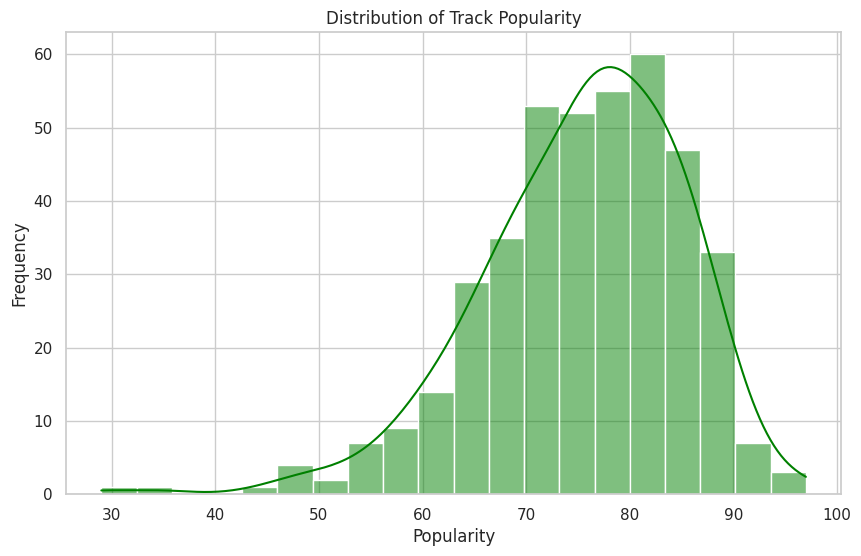

In [5]:
sns.histplot(df['Popularity'], bins=20, kde=True, color='green')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

**Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

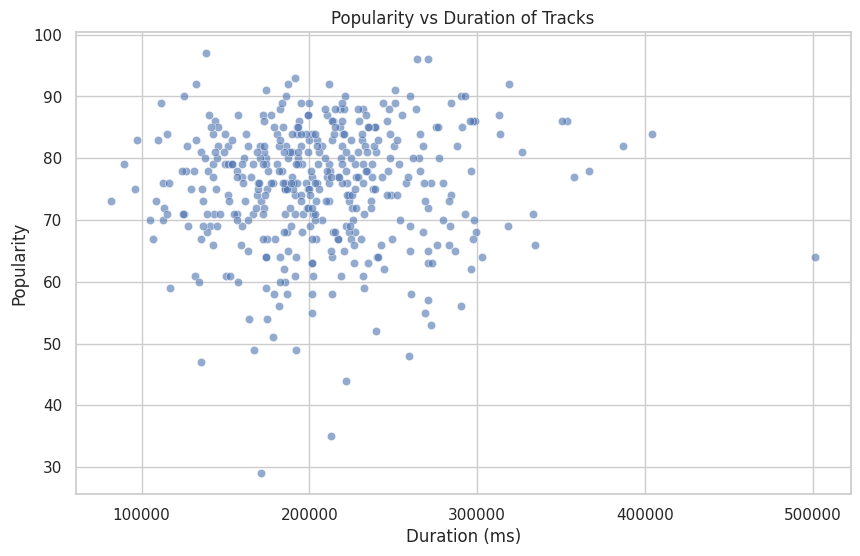

In [6]:
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, alpha=0.6)
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

**Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using**
**a countplot.**

<ipython-input-7-48b5ad978eff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists.index)],


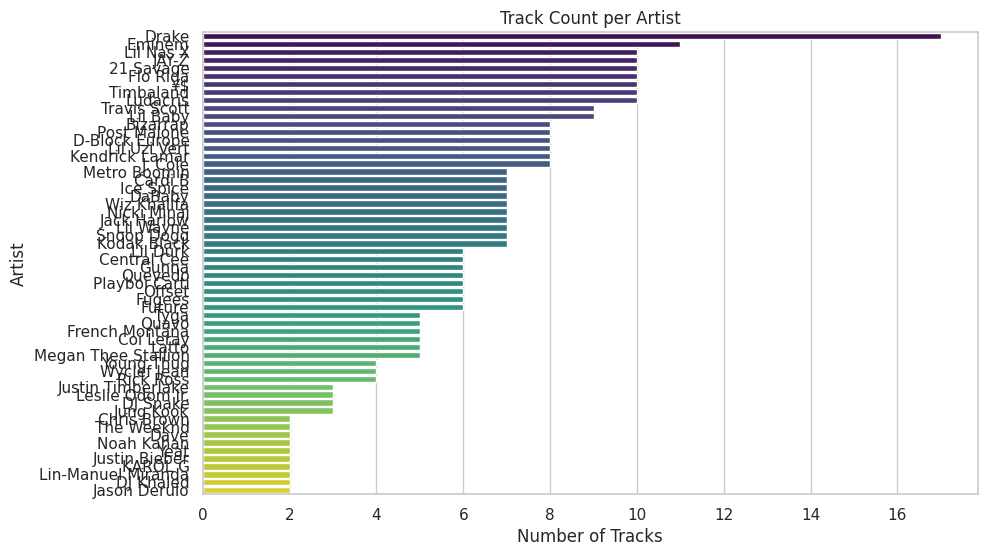

Top artist by number of tracks:
Artist
Drake    17
Name: count, dtype: int64


In [7]:
artist_counts = df['Artist'].value_counts()
top_artists = artist_counts[artist_counts > 1]  # Show only artists with >1 track

sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists.index)],
              order=top_artists.index, palette="viridis")
plt.title("Track Count per Artist")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

# Who has the highest?
print(f"Top artist by number of tracks:\n{artist_counts.head(1)}")

**Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [8]:
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


**Q6.  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and**
**display the average popularity for each artist.**

In [9]:
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print("Top 5 Artists by Average Popularity:")
print(top_5_artists)

Top 5 Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


**Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [10]:
most_popular_tracks = []

for artist in top_5_artists.index:
    artist_tracks = df[df['Artist'] == artist]
    top_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks.append((artist, top_track['Track Name'], top_track['Popularity']))

print("Most Popular Track per Top 5 Artist:")
for item in most_popular_tracks:
    print(f"Artist: {item[0]}, Track: {item[1]}, Popularity: {item[2]}")

Most Popular Track per Top 5 Artist:
Artist: cassö, Track: Prada, Popularity: 92
Artist: Trueno, Track: Mamichula - con Nicki Nicole, Popularity: 89
Artist: David Guetta, Track: Baby Don't Hurt Me, Popularity: 87
Artist: Travis Scott, Track: FE!N (feat. Playboi Carti), Popularity: 93
Artist: ¥$, Track: CARNIVAL, Popularity: 96


**Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

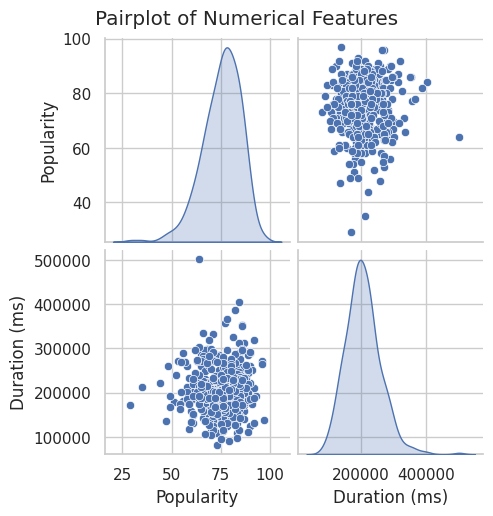

In [11]:
sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

**Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or**
**violin plot.**

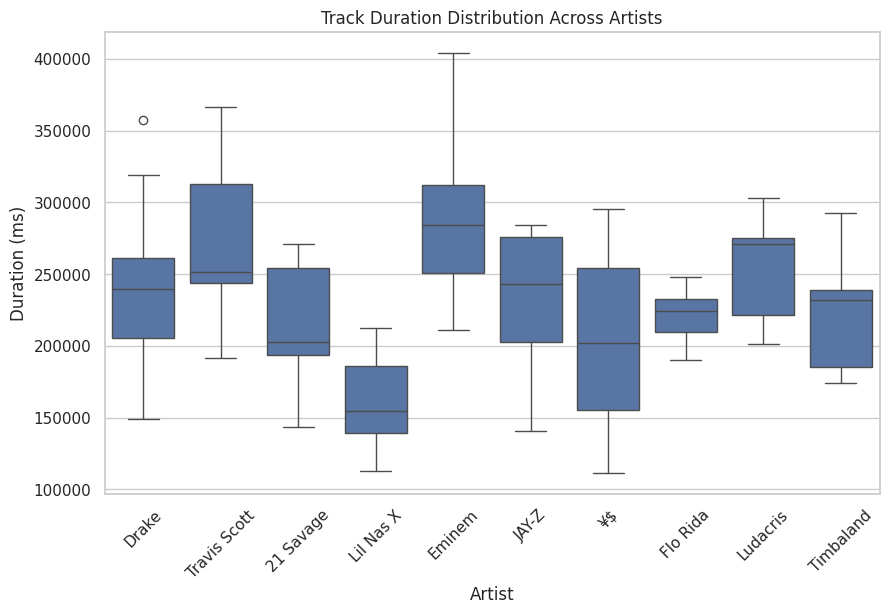

In [12]:
# Show top 10 artists for clarity
top_artists_by_count = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists_by_count)]

sns.boxplot(x='Artist', y='Duration (ms)', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Track Duration Distribution Across Artists")
plt.show()

**Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a**
**violin plot.**

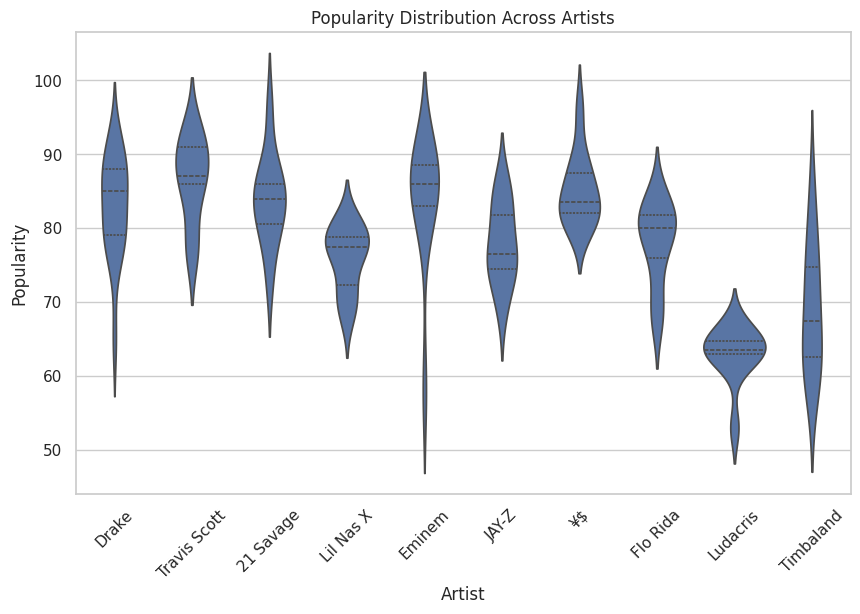

In [13]:
sns.violinplot(x='Artist', y='Popularity', data=filtered_df, inner='quartile')
plt.xticks(rotation=45)
plt.title("Popularity Distribution Across Artists")
plt.show()